<a href="https://colab.research.google.com/github/JoYongJIn/YongJin-Repository/blob/main/ANN_selfstudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ANN 이중분류모델

In [ ]:
from google.colab import drive #구글과 코랩 연결(mount)
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score #필요한 모듈들

df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/diabetes_prediction_dataset.csv",sep = ",")
df.head()#csv파일 읽어들인후 위에 5개 샘플 출력

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
#전처리 및 EDA(Exploratory Data Analysis)과정 : 데이터 분석의 초기단계 데이터 탐색 하고 특성 패턴 관계등 통계적 방법이용

In [ ]:
df.describe() #Df의 기술적 통계정보 제공 #10만개의 batch(=sample)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.info() #데이터 정보 #결측치없다. #feature(특성) 탐색

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.isnull().sum() #결측치 없음 확인 완료

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.diabetes.value_counts(normalize = True).mul(100) #class분포 확인(발병자 데이터가 적다.)
#mul(100)은 백분율 100으로 나타내는것이다.

0    91.5
1     8.5
Name: diabetes, dtype: float64

In [ ]:
pd.crosstab(df.gender, df.diabetes, margins = True) #변수상관 관계 분석

diabetes,0,1,All
gender,,,
Female,54091,4461,58552
Male,37391,4039,41430
Other,18,0,18
All,91500,8500,100000


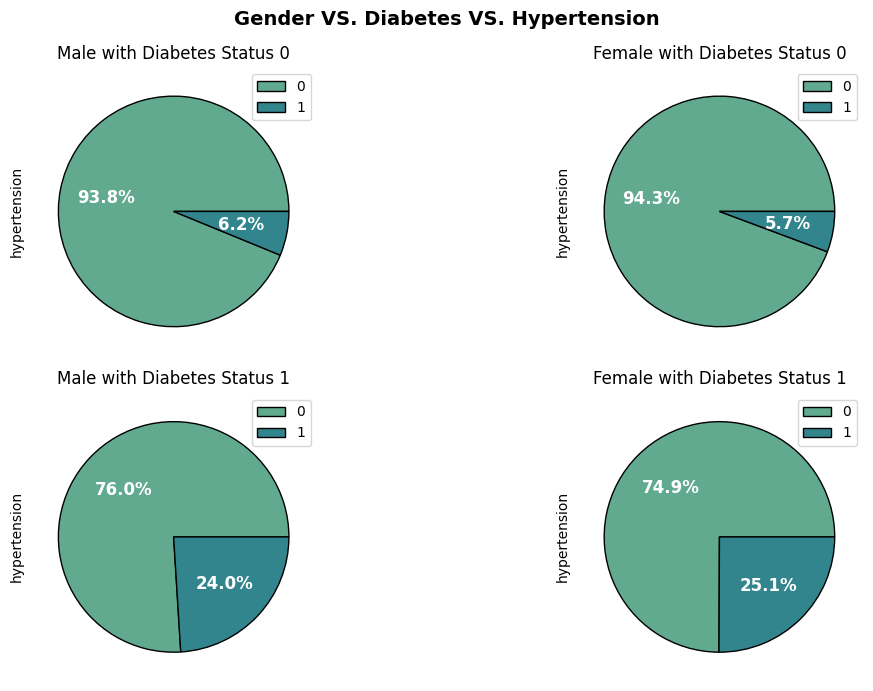

In [ ]:
fig = plt.figure(figsize=(13, 7)) #변수 상관관계 분석하는 차트
subgroups = [('Male', 0), ('Female', 0), ('Male', 1), ('Female', 1)]

colors = sns.color_palette("crest", 3)

for i, subgroup in enumerate(subgroups):
    gender, diabetes = subgroup
    ax = plt.subplot(2, 2, i + 1)
    data = df[(df['gender'] == gender) & (df['diabetes'] == diabetes)]
    wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
    textprops = {'color': 'white', 'fontsize': 12, 'fontweight': 'bold'}
    data['hypertension'].value_counts().plot(kind='pie', colors=colors, wedgeprops=wedgeprops, textprops=textprops, autopct='%1.1f%%')

    plt.title(f'{gender} with Diabetes Status {diabetes}')
    plt.legend()

fig.suptitle("Gender VS. Diabetes VS. Hypertension", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
cat_cols = [x for x in df.dtypes.index if df.dtypes[x] == 'object'] #EDA 과정

for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


gender:
Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

smoking_history:
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64


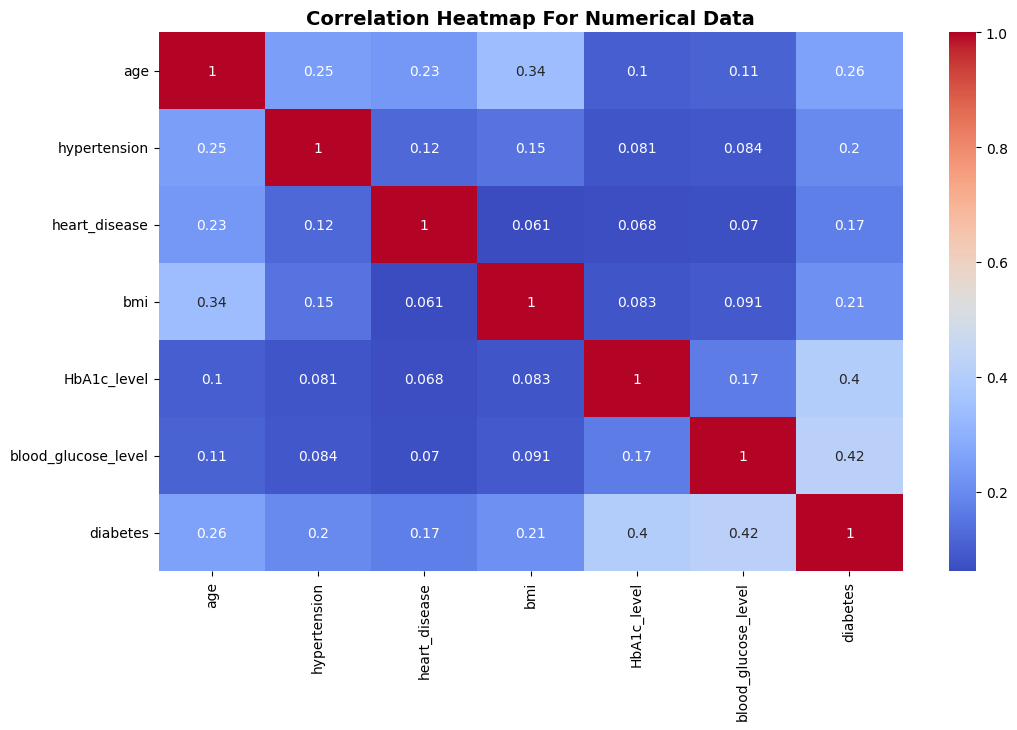

In [ ]:
#EDA과정 상관과계 분석
con_cols = [x for x in df.dtypes.index if df.dtypes[x] != 'object']

plt.figure(figsize = (12,7))
sns.heatmap(df[con_cols].corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap For Numerical Data", fontsize = '14', fontweight= 'bold')
plt.show()

In [ ]:
df['smoking_history'].value_counts() #흡연경력 feature EDA

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [ ]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [ ]:
#성별(범주형자료) 0과 1로 one-hotencoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
# 흡연경력을 숫자형식으로 변경하였다.
smoking_history_mapping = {'never': 0, 'No Info': -1, 'current': 2, 'former': 1, 'ever': 2, 'not current': 0}
df['smoking_history'] = df['smoking_history'].map(smoking_history_mapping)

df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,0.001160,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,0.991609,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,-1.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,-1.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,2.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
#ANN을 통한 학습

In [ ]:
#data를 df로 바꾸지 않아 계속 오류가 나왔다.
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
from sklearn import preprocessing #표준화하기(전처리)
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping #enarlystopping을 통해
#과접합방지, 효율적인 시간과 자원사용, 일반화 성능개선

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
#활성함수 세개 중 하나만 사용하면된다.
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#딥러닝 모델을 학습하기 전에 컴퓨터가 모델을 효율적으로 실행할 수 있도록 준비하는 과정을 "컴파일(Compile)"이라고 합니다.
#컴파일은 모델의 최적화 알고리즘, 손실 함수, 성능 지표 등을 설정하여 모델을 구성하는 단계입니다.
#1.최적화 알고리즘(optimizer): 모델의 가중치를 업데이트하는 최적화 알고리즘을 선택합니다.
#일반적인 옵션으로는 'adam','sgd' 등이 있습니다. 각각의 최적화 알고리즘은 모델의 학습 속도와 성능에 영향을 미칠 수 있습니다.

#2.손실 함수(loss function): 모델이 예측한 값과 실제 타깃값 사이의 차이를 측정하는 함수를 선택합니다.
#손실 함수는 모델이 얼마나 정확한 예측을 하는지 평가하는데 사용됩니다. 분류 문제에서는 'binary_crossentropy'나
#'categorical_crossentropy' 'mean_squared_error'와 같은 함수가 일반적으로 사용됩니다.

#3.성능 지표(metrics): 모델의 성능을 평가하기 위한 지표를 선택합니다.
#일반적으로는 'accuracy', 'precision', 'recall' 등이 사용됩니다.
#성능 지표는 모델의 성능을 측정하고 모니터링하는데 사용됩니다.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
deep_history = ann.fit(X_train, y_train, epochs=100,
                              validation_data = (X_test, y_test),
                              callbacks=[early_stop])

Epoch 1/100
2500/2500 [==============================] - 7s 2ms/step - loss: 0.1624 - accuracy: 0.9503 - val_loss: 0.1174 - val_accuracy: 0.9578
Epoch 2/100
2500/2500 [==============================] - 6s 3ms/step - loss: 0.1146 - accuracy: 0.9597 - val_loss: 0.1147 - val_accuracy: 0.9591
Epoch 3/100
2500/2500 [==============================] - 6s 3ms/step - loss: 0.1128 - accuracy: 0.9607 - val_loss: 0.1139 - val_accuracy: 0.9593
Epoch 4/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1120 - accuracy: 0.9608 - val_loss: 0.1142 - val_accuracy: 0.9592
Epoch 5/100
2500/2500 [==============================] - 6s 3ms/step - loss: 0.1112 - accuracy: 0.9612 - val_loss: 0.1127 - val_accuracy: 0.9601
Epoch 6/100
2500/2500 [==============================] - 6s 3ms/step - loss: 0.1105 - accuracy: 0.9610 - val_loss: 0.1118 - val_accuracy: 0.9599
Epoch 7/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1096 - accuracy: 0.9614 - val_loss: 0.1104 - val_ac

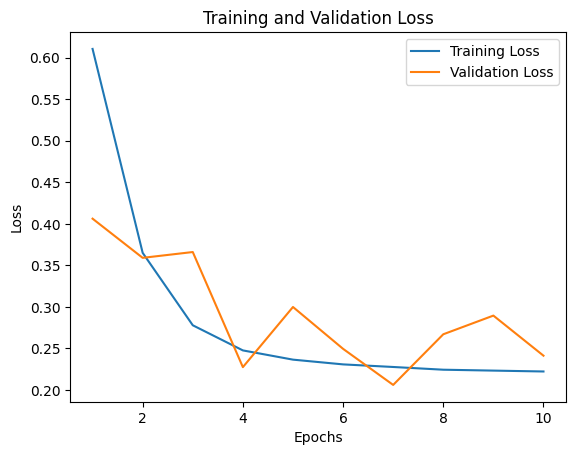

In [ ]:
#epoch가 진행됨에따라 loss값의 변화를 볼수있는 그래프 작성
import matplotlib.pyplot as plt

# 모델 학습을 위해 저장된 loss 값 추출
loss = deep_history.history['loss']
val_loss = deep_history.history['val_loss']

# epoch에 따른 loss 그래프 작성
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#모델의 accuracy는 직접적으로 알수없는 클래스 분류값
y_pred_ann = ann.predict(X_test) #테스트세트에 대한 예측결과이다.
y_pred_ann = (y_pred_ann>0.5) #0.5를 넘으면 양성(True)이라고한다.
print(y_pred_ann) #0.5는 가중치들이 곱해진 후 활성화 함수를 통과한 결과값을 나타낸다.

625/625 [==============================] - 1s 2ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# 입력 데이터와 타겟 변수 준비
X_a = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']].values  # 입력 데이터 (feature들)
y = df['diabetes']  # 타겟 변수

import pandas as pd

X = pd.DataFrame(X_a, columns=['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level'])


# K-fold 교차 검증을 위한 K 값 설정
k = 5

# K-fold 객체 생성
kf = KFold(n_splits=k)

# 결과 저장을 위한 리스트
accuracy_scores = []

# K-fold 교차 검증 실행
for train_index, test_index in kf.split(X):
    # 훈련 데이터와 검증 데이터 분할
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # ANN 모델 학습 및 예측
    ann.fit(X_train, y_train)
    y_pred = ann.predict(X_test)
    y_pred = (y_pred > 0.5)

    # 정확도 평가 및 결과 저장
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# K-fold 교차 검증 결과 출력
print("Accuracy scores:", accuracy_scores)
print("Mean accuracy:", np.mean(accuracy_scores))
print("Standard deviation:", np.std(accuracy_scores))


NameError: ignored

In [ ]:
#Apply SMOTE Technique to balance the data

In [ ]:
from sklearn.model_selection import train_test_split
(X_sample, y_sample) = train_test_split(df, train_size=0.8, stratify = y)

In [ ]:
X_train = X_sample.iloc[:,:-1].values
y_train = X_sample.iloc[:,-1].values
X_test_smote = y_sample.iloc[:,:-1].values
y_test_smote = y_sample.iloc[:,-1].values

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
#활성함수 세개 중 하나만 사용하면된다.
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
deep_history = ann.fit(X_train_smote, y_train_smote, epochs=100,
                              validation_data = (X_test_smote, y_test_smote),
                              callbacks=[early_stop])

Epoch 1/100
4575/4575 [==============================] - 11s 2ms/step - loss: 0.6105 - accuracy: 0.7197 - val_loss: 0.4062 - val_accuracy: 0.8190
Epoch 2/100
4575/4575 [==============================] - 10s 2ms/step - loss: 0.3651 - accuracy: 0.8504 - val_loss: 0.3591 - val_accuracy: 0.8350
Epoch 3/100
4575/4575 [==============================] - 9s 2ms/step - loss: 0.2779 - accuracy: 0.8897 - val_loss: 0.3661 - val_accuracy: 0.8213
Epoch 4/100
4575/4575 [==============================] - 9s 2ms/step - loss: 0.2476 - accuracy: 0.8955 - val_loss: 0.2275 - val_accuracy: 0.8997
Epoch 5/100
4575/4575 [==============================] - 10s 2ms/step - loss: 0.2365 - accuracy: 0.8964 - val_loss: 0.2999 - val_accuracy: 0.8558
Epoch 6/100
4575/4575 [==============================] - 10s 2ms/step - loss: 0.2308 - accuracy: 0.8980 - val_loss: 0.2495 - val_accuracy: 0.8821
Epoch 7/100
4575/4575 [==============================] - 9s 2ms/step - loss: 0.2277 - accuracy: 0.8987 - val_loss: 0.2061 - va

In [ ]:
y_pred_ann_smote = ann.predict(X_test_smote)
y_pred_ann_smote = (y_pred_ann_smote>0.5)

625/625 [==============================] - 1s 1ms/step


In [ ]:
print(confusion_matrix(y_test, y_pred_ann).ravel()[3])

#이와같은 혼동행렬 생성
'''
[[True Negative (TN), False Positive (FP)]
 [False Negative (FN), True Positive (TP)]]
 '''

968


'\n[[True Negative (TN), False Positive (FP)]\n [False Negative (FN), True Positive (TP)]]\n '

In [ ]:
df_2 = pd.DataFrame({
    'Before/After SMOTE': ['Before','After'],
    'Model Name': ['ANN', 'ANN'],
    'True Negative': [confusion_matrix(y_test, y_pred_ann).ravel()[0], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[0]],
    'False Positive': [confusion_matrix(y_test, y_pred_ann).ravel()[1], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[1]],
    'False Negative': [confusion_matrix(y_test, y_pred_ann).ravel()[2], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[2]],
    'True Positive': [confusion_matrix(y_test, y_pred_ann).ravel()[3], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[3]],
    'Accuracy Score': [accuracy_score(y_test, y_pred_ann), accuracy_score(y_test_smote, y_pred_ann_smote)],
    'F1 Score': [f1_score(y_test, y_pred_ann), f1_score(y_test_smote, y_pred_ann_smote)],
})

print(df_2)

  Before/After SMOTE Model Name  True Negative  False Positive  \
0             Before        ANN          18232              60   
1              After        ANN          16202            2098   

   False Negative  True Positive  Accuracy Score  F1 Score  
0             740            968          0.9600  0.707602  
1             176           1524          0.8863  0.572717  


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

# 신경망 모델 생성
ann = Sequential()
ann.add(Dense(64, activation='relu', input_dim=7, kernel_regularizer=regularizers.l1(0.01)))
ann.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 및 학습
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=10, batch_size=32)


ValueError: ignored